# The Three Body Problem  
Using Verlet intergration evolve a 3 body system for position and velocity.  
Calculate angular momentum of the bodies.  
Calculate total energy (potential and kinetic).  
### Verlet  
velocity half step  
$ v_{n+\frac{1}{2}} = v_n +\frac{1}{2} ha (x_n) $  
$ x_{n+1} = x_n +hv_{n+\frac{1}{2}} $  
$ v_{n+1} = v_{n+\frac{1}{2}} +\frac{1}{2} ha (x_{n+1}) $ 

position half step  
$ x_{n+\frac{1}{2}} = x_n +\frac{1}{2}hv_n $  
$ v_{n+1} = v_n +h(x_{n+\frac{1}{2}}) $  
$ x_{n+1} = x_{n+\frac{1}{2}} +\frac{1}{2}hv_{n+1} $  




$ h $ is timestep  
$ a(x) $ is acceleration at point x. I will calulate using the force function defined near the top, and divide it by mass. So that it in keeping with the other solvers here.

In [8]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.constants as sc

### Functions

In [12]:
def force(pos1, pos2, pos3, ma1, ma2, ma3):
    """gravitational force between planets
    pos's will hold the current location of the planets in a 3 compenent array, xyz.
    a: relates to pos 1 and pos2
    b: relates to pos1 and pos 3
    c: relates to pos2 and pos 3"""
    
    sep_a = np.sqrt((pos2[0] - pos1[0])**2 + (pos2[1] - pos1[1])**2 + (pos2[2] - pos1[2])**2)
    fa = - sc.G * (m1+m2)/(sep_a**2)
    sep_b = np.sqrt((pos3[0] - pos1[0])**2 + (pos3[1] - pos1[1])**2 + (pos3[2] - pos1[2])**2)
    fb = - sc.G * (m1+m3)/(sep_b**2)
    sep_c = np.sqrt((pos3[0] - pos2[0])**2 + (pos3[1] - pos2[1])**2 + (pos3[2] - pos2[2])**2)
    fc = - sc.G * (m2+m3)/(sep_c**2)

    
    
    return 

In [17]:
def force(pos1, pos2, pos3, ma1, ma2, ma3):
    """the three positions are made form xyz components.
    ab: p1-p2
    ac: p1-p3
    bc: p3-p2"""

    ab_vec = np.array([pos2[0] - pos1[0], pos2[1] - pos1[1]])
    ac_vec = np.array([pos3[0] - pos1[0], pos3[1] - pos1[1]])
    bc_vec = np.array([pos3[0] - pos2[0], pos3[1] - pos2[1]])

    ab_sep_sq = np.sum(ab_vec**2)
    ac_sep_sq = np.sum(ac_vec**2)
    bc_sep_sq = np.sum(bc_vec**2)

    f_ab = -sc.G *(ma1+ma2) / ab_sep_sq 
    f_ac = -sc.G *(ma1+ma3) / ac_sep_sq 
    f_bc = -sc.G *(ma2+ma3) / bc_sep_sq 

    ab_ang = np.arctan(ab_vec[0] / ab_vec[1])    
    ac_ang = np.arctan(ac_vec[0] / ac_vec[1])    
    bc_ang = np.arctan(bc_vec[0] / bc_vec[1])

    

In [19]:
def force(p1, p2, m1, m2):
    """For caclulating the force between two planets
    Call howevermany times it is needed.
    Feed it the information of two specific plants each time.
    pos should be fed in as a two part vector, (x,y)."""

    vec = np.array([p2[0] - p1[0], p2[1]-p1[1]])
    sep_sq = np.sum(vec**2)

    

In [3]:
def Verlet(m1, m2, m3, n_s, t_s, i_pos1, i_vel1, i_pos2, i_vel2, i_pos3, i_vel3):
    """Function runs a verlet intergrator.
    m: mass of object
    n_s: number of steps
    t_s: time step
    i_pos: inital position as an array
    i_vel: inial velocity as an array"""
    
    x_verlet_p1 = np.array([i_pos1[0]])
    y_verlet_p1 = np.array([i_pos1[1]])
    z_verlet_p1 = np.array([i_pos1[2]])
    vx_verlet_p1 = np.array([i_vel1[0]])
    vy_verlet_p1 = np.array([i_vel1[1]])
    vz_verlet_p1 = np.array([i_vel1[2]])

    x_verlet_p2 = np.array([i_pos2[0]])
    y_verlet_p2 = np.array([i_pos2[1]])
    z_verlet_p2 = np.array([i_pos2[2]])
    vx_verlet_p2 = np.array([i_vel2[0]])
    vy_verlet_p2 = np.array([i_vel2[1]])
    vz_verlet_p2 = np.array([i_vel2[2]])

    x_verlet_p3 = np.array([i_pos3[0]])
    y_verlet_p3 = np.array([i_pos3[1]])
    z_verlet_p3 = np.array([i_pos3[2]])
    vx_verlet_p3 = np.array([i_vel3[0]])
    vy_verlet_p3 = np.array([i_vel3[1]])
    vz_verlet_p3 = np.array([i_vel3[2]])
    
    for i in range(n_s-1):

        ax = force(pos = x_verlet[i], ma = m)/m
        vx_next_half = vx_verlet[i] + 0.5*(t_s*ax)
        ay = force(pos = y_verlet[i], ma = m)/m
        vy_next_half = vy_verlet[i] + 0.5*(t_s*ay)
        az = force(pos = z_verlet[i], ma = m)/m
        vz_next_half = vz_verlet[i] + 0.5*(t_s*az)

        x_next_one = x_verlet[i] + t_s * vx_next_half
        y_next_one = y_verlet[i] + t_s * vy_next_half
        z_next_one = z_verlet[i] + t_s * vz_next_half

        ax = force(pos = x_next_one, ma = m)/m
        vx_next_one = vx_next_half + 0.5*(t_s*ax)
        ay = force(pos = y_next_one, ma = m)/m
        vy_next_one = vy_next_half + 0.5*(t_s*ay)
        az = force(pos = z_next_one, ma = m)/m
        vz_next_one = vz_next_half + 0.5*(t_s*az)

        x_verlet = np.append(x_verlet, x_next_one)
        y_verlet = np.append(y_verlet, y_next_one)
        z_verlet = np.append(z_verlet, z_next_one)
        vx_verlet = np.append(vx_verlet, vx_next_one)
        vy_verlet = np.append(vy_verlet, vy_next_one)
        vz_verlet = np.append(vz_verlet, vz_next_one)

    
    return x_verlet, y_verlet, z_verlet, vx_verlet, vy_verlet, vz_verlet

In [5]:
t_step = 0.001
no_steps = 5000
mass=3
pendulum_length = 5
initial_pos = np.array([0,0,0])
initial_vel = np.array([1,2,3])

plan_1_mass = 10
plan_2_mass = 1
plan_3_mass = 3

plan_1_i_pos = np.array([0,0,0])
plan_2_i_pos = np.array([1,0,0])
plan_3_i_pos = np.array([8,8,0])

plan_1_i_vel = np.array([0,0,0])
plan_2_i_vel = np.array([0,0.9,0])
plan_3_i_vel = np.array([8,8,0])

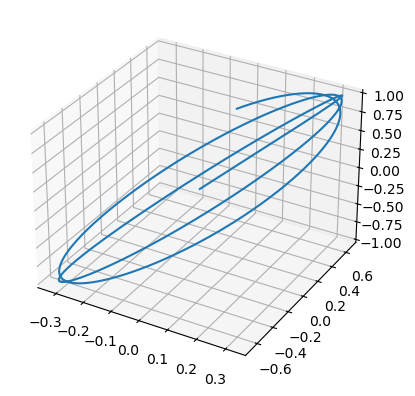

In [7]:
x,y,z,xv,yv,zv = Verlet(m = mass, t_s = t_step, n_s = no_steps, i_pos = initial_pos, i_vel = initial_vel)
fig = plt.figure()
ax = fig.add_subplot(projection = "3d")
ax.plot(x, y, zs = z)
#ax.view_init(elev = 45, azim = -45, roll = -45)